# Analyse data based "sirene_nice"

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from trampact.analyse_ml_sirene import Machine_learning_sirene
import pandas as pd

# import data clean

In [3]:
# entreprise_df=Machine_learning_sirene.get_data_clean()

In [4]:
# entreprise_df.head(2)

In [5]:
# entreprise_df.dtypes.head(30)

# Onehot encoder Année 2005==>2007

In [6]:
#liste feature pour l'encodage
feature_ml=[
            "Date de création de l'unité légale",
            "effectifs",
            "Classe de l'établissement",
            #"Nature juridique de l'unité légale",
            "proche t1"
            ]



In [7]:
#y="proche t1"
#X=le reste
y_encoder, X_encoder, list_y_encoder, list_X_encoder=Machine_learning_sirene.encoder_feature(feature_ml,\
                                                                                             filtre_date=True,\
                                                                                             date_debut=2005,date_end=2007)


/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3441: DtypeWarning: Columns (1,81) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/lewagon/code/eangelid/trampact/trampact/analyse_ml_sirene.py:73: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  entreprise_ml_df["Date de création de l'unité légale"]=\


## Encoder X

In [8]:
X_encoder

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [9]:
X_encoder.shape

(19040, 565)

In [10]:
list_X_encoder

[2005,
 2006,
 2007,
 1,
 2,
 4,
 8,
 15,
 35,
 75,
 150,
 225,
 375,
 750,
 'Accueil de jeunes enfants',
 'Accueil des personnes agees',
 'Action sociale sans hebergement n.c.a.',
 'Activite des economistes de la construction',
 'Activite des geometres',
 'Activite des medecins generalistes',
 'Activites artistiques',
 'Activites chirurgicales',
 'Activites combinees de soutien lie aux batiments',
 'Activites comptables',
 "Activites d'architecture",
 "Activites d'enquete",
 "Activites de centres d'appels",
 'Activites de clubs de sports',
 'Activites de conditionnement',
 'Activites de nettoyage',
 'Activites de pre-presse',
 'Activites de radio',
 'Activites de radiodiagnostic et de radiotherapie',
 'Activites de sante humaine non classees ailleurs',
 'Activites de securite privee',
 "Activites de soutien a l'enseignement",
 'Activites de soutien a la production animale',
 'Activites de soutien au spectacle vivant',
 'Activites de soutien aux cultures',
 "Activites des agences de pl

In [11]:
len(list_X_encoder)

565

## Encoder y

In [12]:
y_encoder

array([[1.],
       [0.],
       [1.],
       ...,
       [0.],
       [0.],
       [1.]])

In [13]:
 list_y_encoder

['non', 'oui']

# Logistic regression

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                    X_encoder, y_encoder, test_size=0.3)

In [15]:
from sklearn.linear_model import LogisticRegression
# Instanciate the model
model = LogisticRegression()
# # Train the model on the Training data
model.fit(X_train, y_train)

/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
model.coef_

array([[-0.06668296, -0.01148654, -0.02386599,  0.18940962,  0.35060254,
         0.50034066,  0.36606053, -0.03339977, -0.33913413, -0.17427228,
        -0.59549967, -0.21153251,  0.2323376 , -0.38694808,  0.14265444,
         0.44160554,  0.10444475,  0.19504476,  0.06702261,  0.20944626,
         0.26599651, -0.86977583, -0.43304511, -0.1146005 ,  0.06603248,
         0.09185231,  0.76025727,  0.2088187 ,  0.44160554, -0.25306589,
        -0.60680044,  0.        , -0.38253958,  0.23500665, -0.43085757,
         0.44403105,  0.08975487, -0.41079594,  0.08765802, -0.78751103,
         0.38576907,  0.42049136,  0.        , -1.19454564,  0.15790807,
         0.19760799,  0.32612138,  0.41046171,  0.24063892,  0.08499435,
         0.45250323,  0.        ,  0.4098632 ,  0.4098632 ,  0.44403105,
         0.02611929,  0.15540146, -0.09191526,  0.16660839, -0.67783713,
        -0.74776896, -0.59568739,  1.36842048, -0.67629143, -0.08408733,
         0.26467835, -0.30887034,  0.38100931,  0. 

In [17]:
model.coef_.shape

(1, 565)

In [18]:
model.score(X_test, y_test)

0.5969887955182073

In [19]:
coef=pd.DataFrame(model.coef_,columns=list_X_encoder).sort_values(by=0,axis=1, ascending=False)
coef

,"Location et location-bail d'autres machines, equipements et biens materiels n.c.a.",Commerce de detail de la chaussure,Services auxiliaires des transports aeriens,Location d'autres biens personnels et domestiques,Commerce de detail d'articles d'horlogerie et de bijouterie en magasin specialise,Commerce de detail d'habillement en magasin specialise,Activites juridiques,Enseignement secondaire general,Superettes,Commerce de detail de fruits et legumes en magasin specialise,...,Construction d'autres ouvrages de genie civil n.c.a.,"Culture de legumes, de melons, de racines et de tubercules",Travaux de montage de structures metalliques,Autres activites sportives,Travaux de menuiserie metallique et serrurerie,Autres activites de nettoyage des batiments et nettoyage industriel,Auxiliaires d'assurance,Services de demenagement,Activites des agences de travail temporaire,Organisation de foires et salons
0,1.661115,1.641175,1.589709,1.473121,1.448192,1.389423,1.36842,1.210783,1.172622,1.137609,...,-0.944808,-0.980276,-0.997594,-0.998013,-1.006898,-1.027225,-1.159447,-1.177973,-1.194546,-1.19825


In [20]:
coef_top=coef.iloc[0,:10]
coef_bad=coef.iloc[0,-10:]

<BarContainer object of 10 artists>

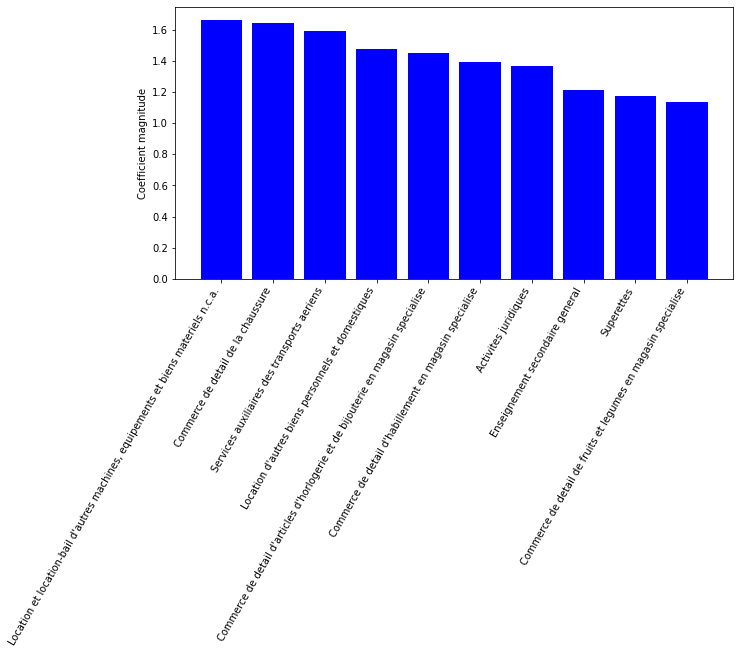

In [21]:
import matplotlib.pyplot as plt
# plot top
# plot param
nbr_value=len(coef_top.index.tolist())
plt.figure(figsize=(10, 5))
plt.ylabel("Coefficient magnitude")
plt.xticks(np.arange(1,  1+ nbr_value),
            coef_top.index, rotation=60,
            ha="right")
#plot
plt.bar(np.arange(1,1+ nbr_value), coef_top.values,color="blue")

<BarContainer object of 10 artists>

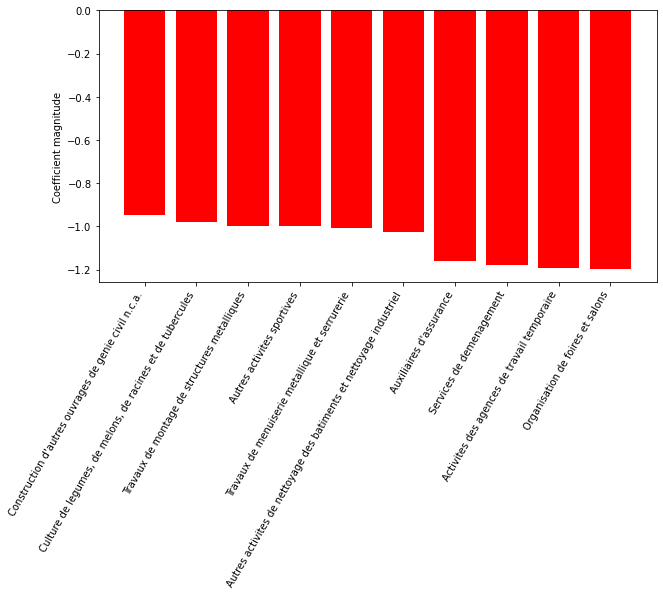

In [22]:
# plot bad
# plot param
nbr_value=len(coef_bad.index.tolist())
plt.figure(figsize=(10, 5))
plt.ylabel("Coefficient magnitude")
plt.xticks(np.arange(1,  1+ nbr_value),
            coef_bad.index, rotation=60,
            ha="right")
#plot
plt.bar(np.arange(1,1+ nbr_value), coef_bad.values,color="red")

In [23]:
# #Méthode direct pour trajet le plot
# coef.iloc[0,:10].plot.bar()

## Learning curve

In [24]:
# train_sizes=[]
# nbre_cv=5
# nbre_data=round(len(X_encoder)*1/nbre_cv)
# subdivision=round(nbre_data/10)
# test=0
# for i in range(1, 10):
#     test=i*subdivision
#     train_sizes.append(test)
# train_sizes.append(nbre_data)
# train_sizes[::1]

In [25]:
# from sklearn.model_selection import learning_curve


# # Get train scores (accurance), train sizes, and validation scores using `learning_curve`
# train_sizes, train_scores, test_scores = learning_curve(
#     estimator=LogisticRegression(), X=X_encoder, y=y_encoder, train_sizes=train_sizes, cv=nbre_cv)

In [26]:
# train_scores_mean = np.mean(train_scores, axis=1)
# train_scores_mean

In [27]:
# test_scores_mean = np.mean(test_scores, axis=1)
# test_scores_mean

In [28]:
# plt.plot(train_sizes, train_scores_mean, label = 'Training score')
# plt.plot(train_sizes, test_scores_mean, label = 'Test score')
# plt.ylabel('accurance', fontsize = 14)
# plt.xlabel('Training set size', fontsize = 14)
# plt.title('Learning curves', fontsize = 18, y = 1.03)
# plt.legend()

## Selecting the Most Important Features

In [29]:
# Permutation Importance
from sklearn.inspection import permutation_importance

In [30]:
# n_repeats=5

In [31]:
# Fit model
model = LogisticRegression()
model.fit(X_train, y_train) 

# Perform Permutation
permutation_score = permutation_importance(model, X_train, y_train, n_repeats=5) 



/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
/home/lewagon/.pyenv/versions/3.8.6/envs/trampact/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
# Unstack results
importance_df = pd.DataFrame(np.vstack((list_X_encoder,
                                        permutation_score.importances_mean)).T) 
importance_df.columns=['feature','score decrease']


# # Order by importance
most_important_features = importance_df.sort_values(by="score decrease", ascending = False)
most_important_features.head(10)

,feature,score decrease
531,Transports routiers de fret de proximite,9.003601440582543e-05
541,Travaux d'installation electrique dans tous lo...,9.003601440582543e-05
313,Entretien corporel,9.003601440580323e-05
442,Platrerie,9.003601440580323e-05
410,Location de courte duree de voitures et de veh...,9.003601440580323e-05
367,Formation des adultes et formation continue,9.003601440580323e-05
181,Commerce de detail de journaux et papeterie en...,9.003601440580323e-05
325,Fabrication d'articles de joaillerie et bijout...,9.003601440580323e-05
353,Fabrication de pates alimentaires,9.003601440578101e-05
50,Activites des organisations et organismes extr...,9.003601440578101e-05
